<a href="https://colab.research.google.com/github/JyotiSingh0996/Projects-of-data-science-by-Jyoti-Singh/blob/main/Taiyo_ai_Assignment_Supervised_machine_Learning_Colab_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Objective - Predict Domestic Market

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz
#mport shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dfset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dfset_first_look
df = pd.read_csv('/content/drive/MyDrive/Random Price Dataset Trial Assignment (1).csv')
df.head()

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,...,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,South_korea_import
0,01/01/2000,41,NaN,NaN,27.18,25.51,1.29,6902.10,863.10,29.21,...,NaN,NaN,"6,833,222.00","2,649,293.00","35,239,920.00",NaN,NaN,NaN,NaN,NaN
1,01/02/2000,41,NaN,NaN,29.35,27.78,1.38,6584.40,972.70,33.39,...,NaN,NaN,"5,647,987.00","2,787,667.00","36,716,752.00",NaN,NaN,NaN,NaN,NaN
2,01/03/2000,45,NaN,NaN,29.89,27.49,1.52,6424.10,1330.50,30.94,...,NaN,NaN,"6,721,125.00","4,692,701.00","45,144,561.00",NaN,NaN,NaN,NaN,NaN
3,01/04/2000,47,NaN,NaN,25.74,22.76,1.47,7070.50,1227.50,31.93,...,NaN,NaN,"7,169,182.00","2,565,068.00","32,240,349.00",NaN,NaN,NaN,NaN,NaN
4,01/05/2000,47,NaN,NaN,28.78,27.74,1.49,7850.20,1526.30,31.20,...,NaN,NaN,"10,466,333.00","4,671,325.00","29,351,633.00",NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,...,WPU0915021625,PCU3252132521,MHHNGSP,WPU072205011,PCU32611132611115,PCU32611332611301.1,PCU32611132611112,WPU0915021622,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,South_korea_import
count,276.00,185.00,125.00,276.00,276.00,276.00,275.00,275.00,275.00,275.00,...,132.00,228.00,276.00,115.00,115.00,204.00,115.00,133.00,276.00,0.00
mean,72.38,57.98,60.40,62.51,65.40,2.57,29591.89,7176.50,89.58,185.98,...,108.87,164.04,4.52,106.62,135.45,201.24,128.04,111.18,222.32,NaN
std,19.41,13.12,12.65,26.07,29.61,0.78,12303.53,3764.25,46.39,31.71,...,10.69,25.56,2.17,11.89,15.07,50.82,14.15,12.07,51.94,NaN
min,32.00,28.00,33.25,16.55,18.38,1.09,6375.60,863.10,22.12,135.00,...,99.50,100.00,1.63,94.10,100.00,102.80,100.00,99.20,122.90,NaN
25%,57.75,49.00,53.00,41.00,42.73,1.98,20508.61,3644.35,60.83,155.65,...,103.00,145.00,2.88,99.70,126.90,152.80,120.00,104.10,193.38,NaN
50%,73.00,59.00,59.00,59.28,62.77,2.56,31563.99,8080.52,78.41,193.40,...,105.00,165.55,3.96,102.00,130.20,215.60,123.10,107.20,227.55,NaN
75%,86.00,67.00,67.50,84.17,85.59,3.15,39575.41,9741.47,107.59,208.60,...,107.53,176.95,5.73,106.25,133.05,231.90,127.15,111.40,249.00,NaN
max,108.00,92.00,100.75,133.93,132.72,4.93,52081.07,16678.51,280.79,278.02,...,143.79,231.26,13.42,138.09,179.10,311.13,168.91,147.62,359.61,NaN


In [ ]:
# dfset Rows & Columns count
df.shape

(276, 50)

In [ ]:
# dfset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 50 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   Date                                                                                                                        276 non-null    object 
 1   Domestic Market (Contract) Blow Molding, Low                                                                                276 non-null    int64  
 2   Spot/Export Blow Molding                                                                                                    185 non-null    float64
 3   Spot, Domestic                                                                                                              1

In [ ]:
# count Duplicate values
df.duplicated().sum()

0

In [ ]:
# check null values
df.isnull().sum()

Date                                                                                                                            0
Domestic Market (Contract) Blow Molding, Low                                                                                    0
Spot/Export Blow Molding                                                                                                       91
Spot, Domestic                                                                                                                151
WTISPLC                                                                                                                         0
MCOILBRENTEU                                                                                                                    0
GASREGM                                                                                                                         0
IMPCH                                                                                     

# Understand the datast

In [ ]:
# WTISPLC - West Texas Intermediate Spot Crude Oil price (West Texas Intermediate (WTI) is a grade or mix of crude oil)
# MCOILBRENTEU - Crude Oil Price of Brent Crude (oil market based around the North Sea of Northwest Europe)
# GASREGM - US Regular all formation Gas Price
# IMPCH -  U.S. Imports of Goods by Customs Basis from China
# EXPCH - U.S. Exports of Goods by F.A.S. Basis to Mainland China (EXPCH)
# PRUBBUSDM - Global Price of Rubber
# WPUFD4111 - Producer Price Index by Commodity: Final Demand: Finished Consumer Foods 
# PCU325211325211 - Producer Price Index by Industry: Plastics Material and Resin Manufacturing
# PCU32611332611301 -  Producer Price Index by Industry: Nonpackaging Plastics Film and Sheet 
# WPU0915021625 - Producer Price Index by Commodity: Pulp, Paper, and Allied 
# PCU3252132521 - Producer Price Index by Industry: Resin and Synthetic Rubber Manufacturing
# MHHNGSP - Henry Hub Natural Gas Spot Price
# WPU072205011 - Rubber and Plastic Products: Unlaminated Polyethylene Film and Sheet
# PCU32611132611115 -  Plastics Bag and Pouch Manufacturing: Other Polyethylene Bags, Pouches, and Liners
# PCU32611332611301.1 - Nonpackaging Plastics Film and Sheet Manufacturing: Unlaminated Polyethylene Film and Sheet
# PCU32611132611112 -  Producer Price Index by Industry: Plastics Bag and Pouch Manufacturing: Polyethylene Refuse Bags
# WPU0915021622 -  Pulp, Paper, and Allied Products: Polyethylene Refuse Bags


# dataset Preprocessing

In [ ]:
#replace null values in 0
df.fillna(0,inplace=True)

In [ ]:
# Date columns to Date format conversion
#date_col = pd.DatetimeIndex(df['Date'])
#df['Year'] = date_col.year
#df['Month'] = date_col.month
#df['Day'] = date_col.day

In [ ]:
df.columns

Index(['Date', 'Domestic Market (Contract) Blow Molding, Low',
       'Spot/Export Blow Molding', 'Spot, Domestic', 'WTISPLC', 'MCOILBRENTEU',
       'GASREGM', 'IMPCH', 'EXPCH', 'PRUBBUSDM', 'WPUFD4111',
       'PCU325211325211', 'PCU32611332611301', 'WPU0915021625',
       'PCU3252132521', 'MHHNGSP', 'WPU072205011', 'PCU32611132611115',
       'PCU32611332611301.1', 'PCU32611132611112', 'WPU0915021622',
       'Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials ',
       'Australia _export', 'Canada_export', 'Saudi_export', 'Usa_export',
       'India_export', 'Russia_export', 'South_Africa_export', 'Turkey',
       'Brazil', 'France_export', 'Germeny_export', 'United Kingdome_export',
       'China_export', 'Australia _import', 'Canada_import', 'Saudi_import',
       'Usa_import', 'India_import', 'Russia_import', 'South_Africa_import',
       'Turkey_import', 'Brazil_import', 'France_import', 'Germeny_import',
  

In [ ]:
df.drop(columns=['Date'],inplace=True)

In [ ]:
# remove commas 
df = df.replace({',':''}, regex=True)

In [ ]:
# replace str to float
df = df.astype(float)

In [ ]:
# float to int
df = df.astype(int)

In [ ]:
df['Paper_products'] = 0.5*df['WPU0915021625'] + 0.5*df['WPU0915021622']
df['Plastics_bags'] = 0.5*df['PCU32611132611115']+0.5*df['PCU32611132611112']
df['Non_packing_plastics'] = 0.5*df['PCU32611332611301'] + 0.5*df['PCU32611332611301.1']
df['Spot_market'] = 0.6*df['Spot/Export Blow Molding']+0.4*df['Spot, Domestic']
df['Rubber_products'] = df['PRUBBUSDM']+df['WPU072205011']+df['PCU3252132521']+df['PCU325211325211']
df['Crude_oil'] = 0.5*df['WTISPLC'] + 0.5*df['MCOILBRENTEU']


In [ ]:
# remove unncessary columns or null column
df.drop(columns=['WPU0915021625','WPU0915021622','PCU32611132611115','PCU32611132611112','PCU32611332611301','PCU32611332611301','Spot/Export Blow Molding','Spot, Domestic','PRUBBUSDM','WPU072205011','PCU3252132521','PCU325211325211','WTISPLC','MCOILBRENTEU','South_korea_import'],inplace=True)

In [ ]:
df['Natural_gas'] = df['GASREGM']+df['MHHNGSP']

In [ ]:
df.drop(columns=['GASREGM','MHHNGSP'],inplace=True)

In [ ]:
df.drop(columns=['PCU32611332611301.1'],inplace=True)

In [ ]:
df.head()

,"Domestic Market (Contract) Blow Molding, Low",IMPCH,EXPCH,WPUFD4111,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,Australia _export,Canada_export,Saudi_export,Usa_export,India_export,...,United Kingdome_import,China_import,Japan_import,Paper_products,Plastics_bags,Non_packing_plastics,Spot_market,Rubber_products,Crude_oil,Natural_gas
0,41,6902,863,135,139,0,0,0,0,0,...,0,0,0,0.00,0.00,106.00,0.00,187,26.00,3
1,41,6584,972,136,141,0,0,0,0,0,...,0,0,0,0.00,0.00,105.00,0.00,192,28.00,3
2,45,6424,1330,136,146,0,0,0,0,0,...,0,0,0,0.00,0.00,106.00,0.00,193,28.00,3
3,47,7070,1227,137,151,0,0,0,0,0,...,0,0,0,0.00,0.00,106.00,0.00,195,23.50,4
4,47,7850,1526,138,155,0,0,0,0,0,...,0,0,0,0.00,0.00,106.00,0.00,198,27.50,4


In [141]:
# Due to less time , could not do much work on the data

# Remove Outliers

In [ ]:
def remove_outlier(df_in, col_name):

  q1 = df_in[col_name].quantile(0.25)
  q3 = df_in[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
  df_out = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
  return df_out

re_dat = remove_outlier(df, df.columns)

# Check Multicolinearity using VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['MHHNGSP','GASREGM','Date','Domestic Market (Contract) Blow Molding, Low','Year','Month','Day','Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials']]])

,variables,VIF
0,IMPCH,62.01
1,EXPCH,53.62
2,WPUFD4111,93.35
3,Producer Price Index by Industry: Plastics Mat...,168.55
4,Paper_products,15.99
5,Plastics_bags,18.24
6,Non_packing_plastics,17.15
7,Spot_market,11.38
8,Rubber_products,171.51
9,Crude_oil,38.77


# train test split

In [ ]:
X = df.drop(['Domestic Market (Contract) Blow Molding, Low'],axis=1)
y = df['Domestic Market (Contract) Blow Molding, Low']

In [ ]:
# MimMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
print(X.shape,y.shape)

(276, 11) (276,)


## ***Train and Test Split***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)


In [ ]:
from lazypredict.Supervised import LazyRegressor, LazyClassifier

In [ ]:
clas = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clas.fit(X_train, X_test, y_train, y_test) 

100%|██████████| 29/29 [00:03<00:00,  8.52it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.43,0.46,None,0.43,0.23
BaggingClassifier,0.39,0.46,None,0.39,0.05
ExtraTreesClassifier,0.39,0.41,None,0.40,0.18
LabelPropagation,0.41,0.40,None,0.41,0.02
LabelSpreading,0.41,0.40,None,0.41,0.04
LGBMClassifier,0.36,0.39,None,0.35,1.43
DecisionTreeClassifier,0.27,0.28,None,0.28,0.01
ExtraTreeClassifier,0.30,0.27,None,0.33,0.01
LinearSVC,0.27,0.27,None,0.25,0.14


# Logistic Regression

In [ ]:
lr = LogisticRegression(C=1e5, solver='newton-cg', multi_class='multinomial')
lr.fit(X_train,y_train)
preds = lr.predict(X_test)

In [ ]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.339286


In [ ]:
lr_y_pred_test = lr.predict(X_test)
lr_y_pred_train = lr.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(lr_y_pred_test, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         3
          38       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         2
          42       0.00      0.00      0.00         0
          43       0.00      0.00      0.00         0
          45       0.00      0.00      0.00         1
          46       1.00      0.50      0.67         2
          47       1.00      0.50      0.67         2
          49       1.00      1.00      1.00         1
          50       0.50      1.00      0.67         1
          53       0.00      0.00      0.00         1
          55       1.00      0.50      0.67         2
          59       0.00      0.00      0.00         1
          61       0.0

In [ ]:
accuracy_lr= accuracy_score(y_test, lr_y_pred_test)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test,lr_y_pred_test)

print(cf_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


# # Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)
rf_y_pred_test = rf.predict(X_test)
accuracy_rf= accuracy_score(y_test, rf_y_pred_test)
accuracy_rf

0.4107142857142857

In [ ]:
print(classification_report(y_test, rf_y_pred_test))

              precision    recall  f1-score   support

          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         2
          43       0.00      0.00      0.00         1
          46       0.50      1.00      0.67         1
          47       0.50      1.00      0.67         1
          49       1.00      1.00      1.00         1
          50       1.00      1.00      1.00         2
          55       1.00      1.00      1.00         1
          61       0.00      0.00      0.00         1
          62       1.00      1.00      1.00         1
          64       0.00    

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':rf.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,Producer Price Index by Industry: Plastics Mat...,0.13
1,Crude_oil,0.13
2,Rubber_products,0.13
3,EXPCH,0.11
4,IMPCH,0.10


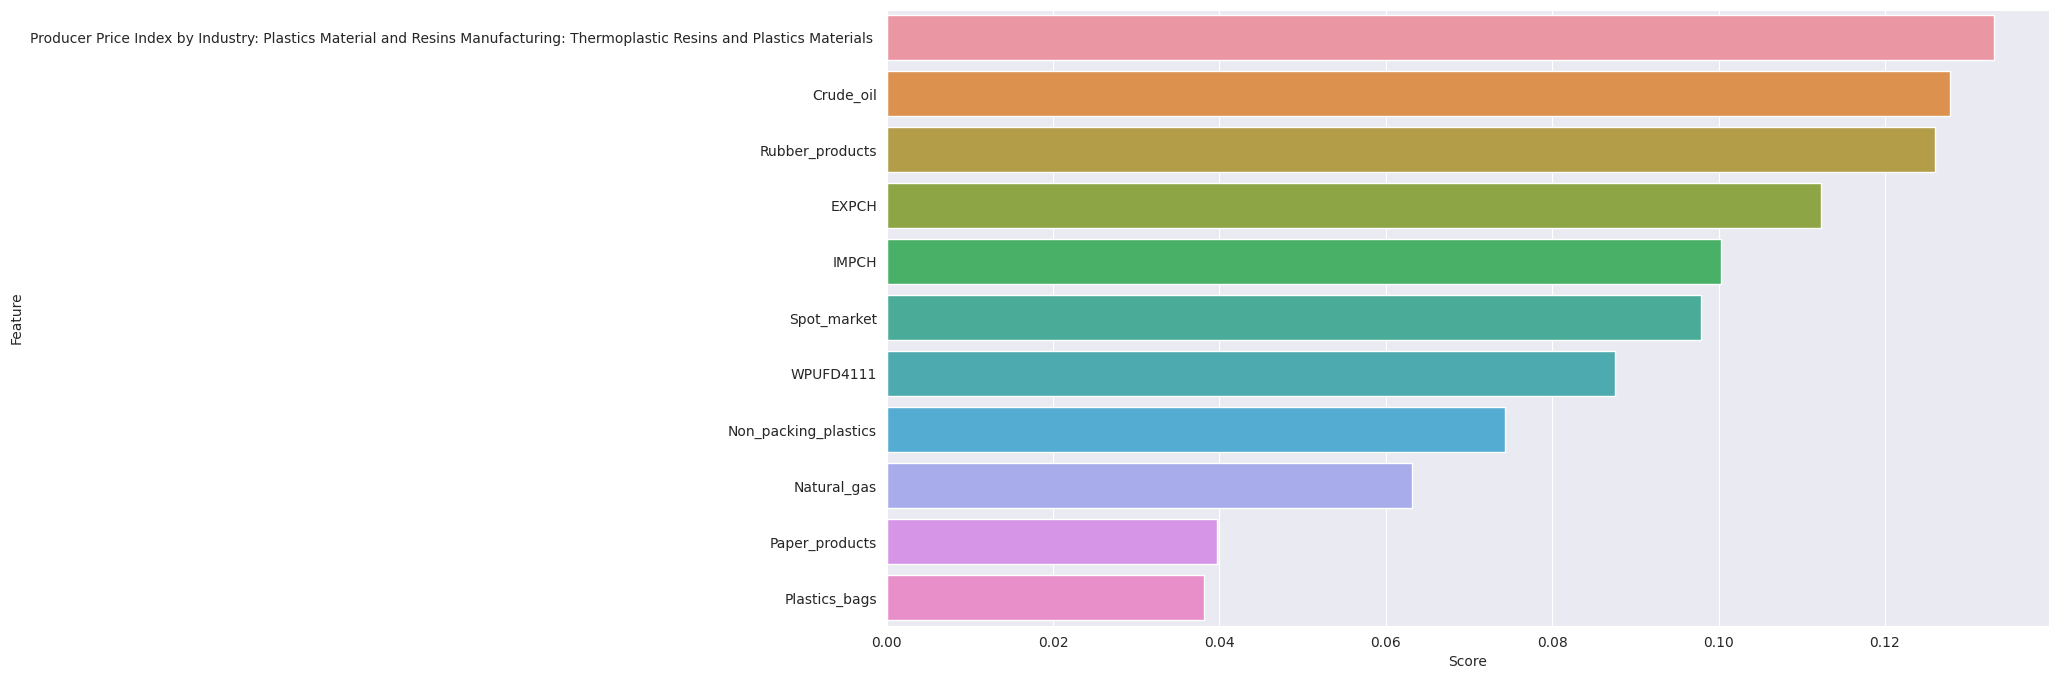

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()


# GINI

In [ ]:
rf_gini= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_gini.fit(X_train, y_train)


RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [ ]:
y_pred_train = rf_gini.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.95

In [ ]:
gini_y_pred_test = rf_gini.predict(X_test)
accuracy_gini=accuracy_score(y_test, gini_y_pred_test)


In [ ]:
print(classification_report(y_test, gini_y_pred_test))


              precision    recall  f1-score   support

          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         2
          43       0.00      0.00      0.00         1
          46       0.50      1.00      0.67         1
          47       0.50      1.00      0.67         1
          49       1.00      1.00      1.00         1
          50       1.00      1.00      1.00         2
          55       1.00      1.00      1.00         1
          61       0.00      0.00      0.00         1
          62       0.00      0.00      0.00         1
          63       0.00      0.00      0.00         0
          64       0.00      0.00      0.00         0
          65       0.50    

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':rf_gini.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()


,Feature,Score
0,Producer Price Index by Industry: Plastics Mat...,0.14
1,Rubber_products,0.13
2,Crude_oil,0.13
3,Spot_market,0.11
4,EXPCH,0.11


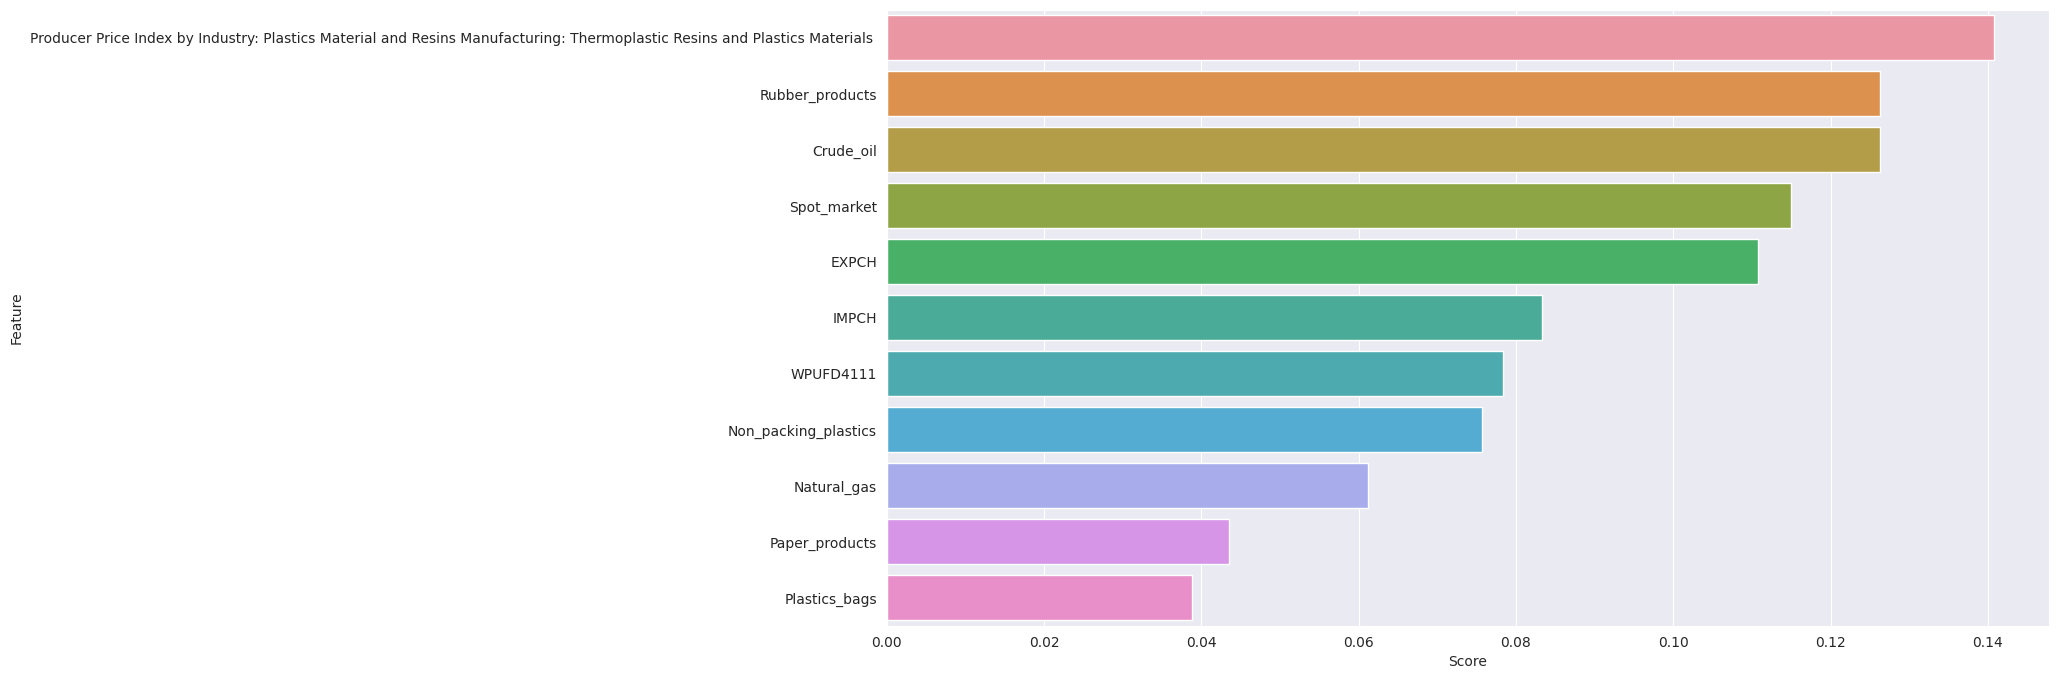

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB().fit(X_train,y_train)

In [ ]:
NB_y_train_pred = NB_model.predict(X_train)
NB_y_test_pred = NB_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_train,NB_y_train_pred))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [ ]:
accuracy_NB=accuracy_score(y_test, NB_y_test_pred)

In [ ]:
print(classification_report(y_test, NB_y_test_pred))

              precision    recall  f1-score   support

          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         2
          43       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         0
          46       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         2
          55       0.00      0.00      0.00         1
          61       0.00      0.00      0.00         1
          62       0.00      0.00      0.00         1
          65       0.20      1.00      0.33         1
          67       0.50    

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)
accuracy_KN = accuracy_score(y_test,knn_predict)
print("Accuracy of the KNeighbors Classifier model: ", accuracy_KN * 100)

Accuracy of the KNeighbors Classifier model:  23.214285714285715


In [ ]:
# Grid search cv
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,21))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options,leaf_size=[1,2,4,5,10,15])
#create a new knn object
knn_2 = KNeighborsClassifier()
# use GridSearch
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
#fit the model
best_model = grid.fit(X_train,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.36818181818181817
{'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(leaf_size=1, n_neighbors=1)


In [ ]:
knn_predict1 = best_model.predict(X_test)
accuracy_KN2 = accuracy_score(y_test,knn_predict1)


In [ ]:
print("Accuracy of the KNeighbors Classifier model: ", accuracy_KN2 * 100)

Accuracy of the KNeighbors Classifier model:  41.07142857142857
